In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers

import numpy as np

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
dataset["Species"].sum()

'Iris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolo

In [7]:
train_data = dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
train_labels = dataset[["Species"]]

In [8]:
train_data.shape

(150, 4)

In [9]:
train_labels.shape

(150, 1)

In [10]:
train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
mean = np.mean(train_data)
std = np.std(train_data)

In [12]:
train_data -= mean
train_data /= std

In [13]:
train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
train_labels.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [15]:
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_labels = encoder.transform(train_labels)

/home/rahul/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rahul/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
def vectorize_data(values, dimension = 3):
    results = np.zeros((len(values), dimension))
    for i, value in enumerate(values):
        results[i, value] = 1.
    return results

In [18]:
labels = vectorize_data(encoded_labels)

In [19]:
labels[57]

array([ 0.,  1.,  0.])

In [20]:
train_data.shape

(150, 4)

In [21]:
labels.shape

(150, 3)

In [22]:
x_train = train_data[:140]
x_test = train_data[140:]

train_labs = labels[:140]
test_labs = labels[140:]

In [23]:
x_train.shape

(140, 4)

In [24]:
x_test.shape

(10, 4)

In [25]:
def build_neural_network():
    nn = Sequential()
    nn.add(layers.Dense(64, activation = "relu", input_shape = (x_train.shape[1], )))
    nn.add(layers.Dense(64, activation = "relu"))
    nn.add(layers.Dense(3, activation = "softmax"))
    nn.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
    return nn

In [26]:
x_train = np.array(x_train)
x_test = np.array(x_test)

train_labs = np.array(train_labs)
test_labs = np.array(test_labs)

In [27]:
x_train[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [28]:
model = build_neural_network()

In [39]:
history = model.fit(x_train, train_labs, epochs = 100)

Epoch 1/100
140/140 [==============================] - 0s - loss: 0.0363 - acc: 0.9929     
Epoch 2/100
140/140 [==============================] - 0s - loss: 0.0384 - acc: 0.9857     
Epoch 3/100
140/140 [==============================] - 0s - loss: 0.0446 - acc: 0.9857     
Epoch 4/100
140/140 [==============================] - 0s - loss: 0.0371 - acc: 0.9929     
Epoch 5/100
140/140 [==============================] - 0s - loss: 0.0363 - acc: 0.9929     
Epoch 6/100
140/140 [==============================] - 0s - loss: 0.0370 - acc: 0.9857     

In [41]:
type(history)

keras.callbacks.History

In [42]:
results = history.history

In [44]:
results.keys()

dict_keys(['loss', 'acc'])

In [45]:
import matplotlib.pyplot as plt

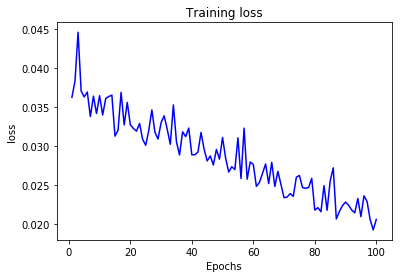

In [46]:
epochs = range(1, 101)

train_loss = results["loss"]
plt.plot(epochs, train_loss, 'b')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Training loss")
plt.show()